# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Sample URL is as follows...
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio grande
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | castillos
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | castelfiorentino
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | dryden
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 15 of Set 1 | mocimboa
Processing Record 16 of Set 1 | hammerfest
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | lazaro cardenas
Processing Record 19 of Set 1 | kashgar
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | yellowknife
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio grande,-32.0350,-52.0986,23.06,84,100,2.19,BR,1711999219
1,waitangi,-43.9535,-176.5597,12.68,90,100,3.49,NZ,1711999219
2,castillos,-34.1667,-53.8333,14.37,89,100,5.00,UY,1711999220
3,longyearbyen,78.2186,15.6401,-16.09,72,75,1.54,SJ,1711999220
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,20,1.54,US,1711999221


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,23.06,84,100,2.19,BR,1711999219
1,waitangi,-43.9535,-176.5597,12.68,90,100,3.49,NZ,1711999219
2,castillos,-34.1667,-53.8333,14.37,89,100,5.00,UY,1711999220
3,longyearbyen,78.2186,15.6401,-16.09,72,75,1.54,SJ,1711999220
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,20,1.54,US,1711999221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

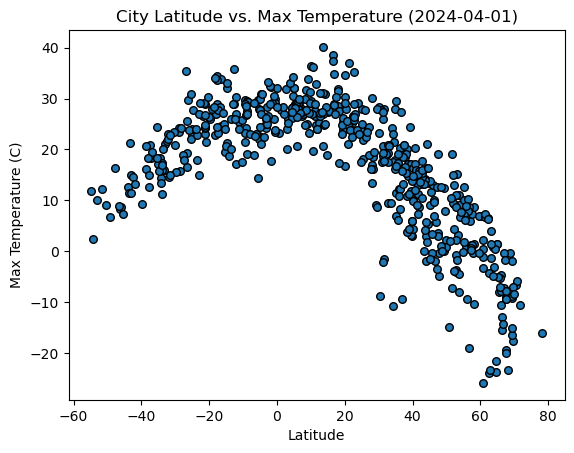

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp', 30, edgecolors='black')

# Incorporate the other graph properties
datestamp = date.fromtimestamp(city_data_df['Date'][0])
title = f'City Latitude vs. Max Temperature ({datestamp})'
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

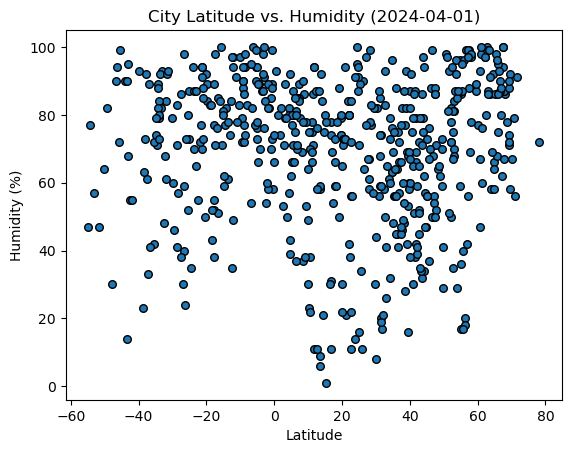

In [9]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', 30, edgecolors='black')

# Incorporate the other graph properties
title = f'City Latitude vs. Humidity ({datestamp})'
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

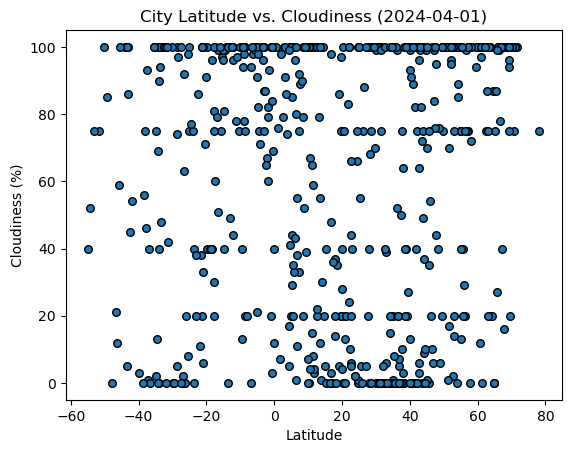

In [10]:
# Build scatter plot for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', 30, edgecolors='black')

# Incorporate the other graph properties
title = f'City Latitude vs. Cloudiness ({datestamp})'
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

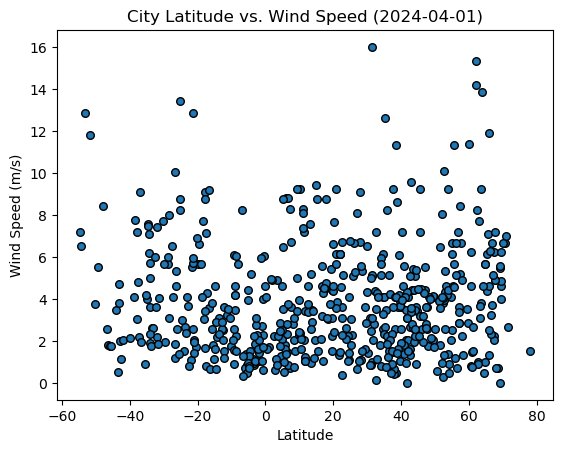

In [11]:
# Build scatter plot for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', 30, edgecolors='black')

# Incorporate the other graph properties
title = f'City Latitude vs. Wind Speed ({datestamp})'
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

# This may not save a lot of code, but it will save our having to
# cut and paste a few lines several times into multiple different plots.

def lr_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.xlabel('Latitude')
    print(f'The r-square value is: {rvalue**2}')
    return line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,longyearbyen,78.2186,15.6401,-16.09,72,75,1.54,SJ,1711999220
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,20,1.54,US,1711999221
5,gadzhiyevo,69.2551,33.3362,-9.27,71,96,5.46,RU,1711999221
6,enewetak,11.3474,162.3373,26.97,71,59,7.18,MH,1711999222
7,castelfiorentino,43.6100,10.9692,14.12,86,0,5.44,IT,1711999222


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,23.06,84,100,2.19,BR,1711999219
1,waitangi,-43.9535,-176.5597,12.68,90,100,3.49,NZ,1711999219
2,castillos,-34.1667,-53.8333,14.37,89,100,5.00,UY,1711999220
8,blackmans bay,-43.0167,147.3167,15.07,95,100,1.98,AU,1711999223
9,port-aux-francais,-49.3500,70.2167,6.68,82,85,5.52,TF,1711999223


###  Temperature vs. Latitude Linear Regression Plot

The r-square value is: 0.7435549881622304


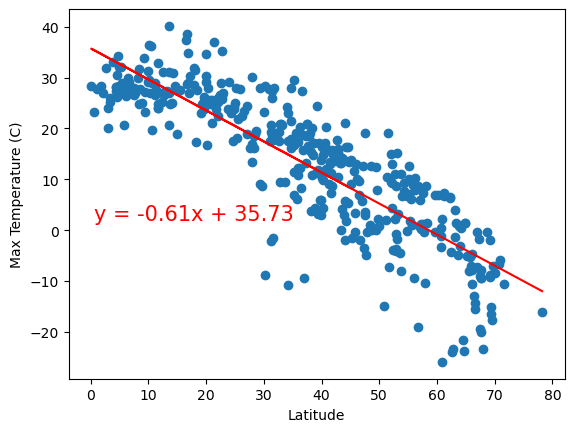

In [15]:
# Linear regression on northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
line_eq = lr_plot(x_values, y_values)
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,(0.5,2),fontsize=15,color="red")

# Note that in the starter code provided, the printed label is 'r-value',
# but it is clear from the fact that regressions with negative slopes 
# had a positive 'r-value' that the label is incorrect in the starter code
# and that r-square value was what was intended. I will use r-square value in
# all cases


plt.show()



The r-square value is: 0.508134410864366


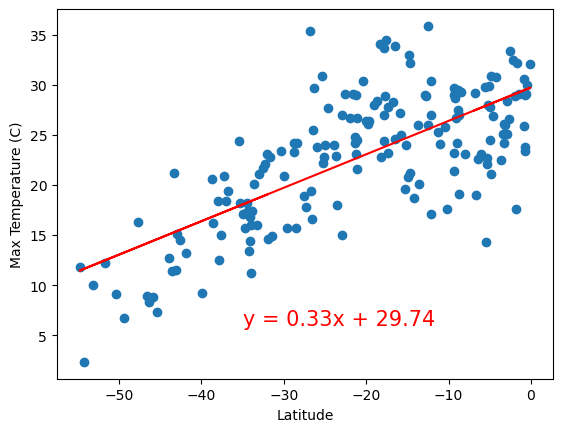

In [16]:
# Linear regression on southern hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
line_eq = lr_plot(x_values, y_values)
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,(-35,6),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The relatively high values of the two r square values suggests a strong correlation between daytime high temperatures and latitude. In the case of the northern hemisphere, the relationship is a negative correlation as indicated by the negative slope of the regression line, while in the southern hemisphre the relationship is a positive correlation. In other words, maximum temperatures tend to be highest near the equator, and generally drop off linearly as you get farther and farther from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-square value is: 0.035869603820999504


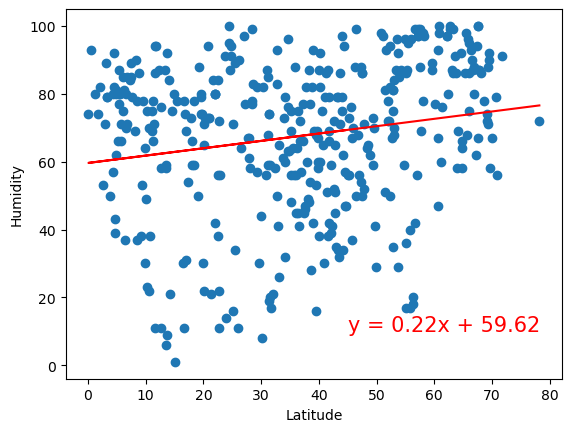

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
line_eq = lr_plot(x_values, y_values)
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

The r-square value is: 0.07253864566612798


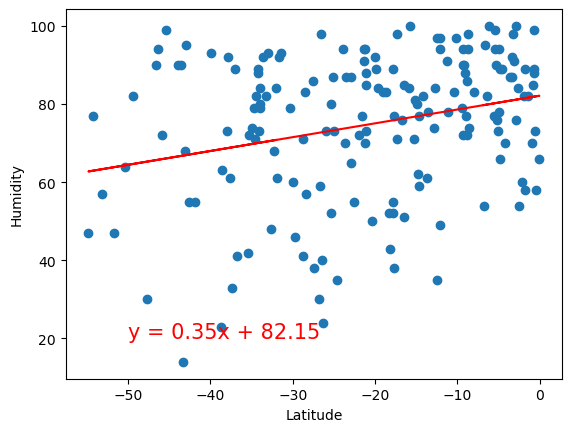

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
line_eq = lr_plot(x_values, y_values)
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There does appear to be a very weak correlation in both the northern and southern hemisphere data based on the r-square value. In the northern hemispheres, humidity levels are generally highest farthest from the equator, while in the southern hemisphre, humidity levels are actually slightly higher near the equator. This is likely a combination of two factors. First, we need to keep in mind that humidity is measured as "relative" humidity, i.e., the percentage of saturation based on temperature, so as you move into colder areas (farther away from the equator), the same moisture content in absolute terms will generate a higher "relative" humidity. Second, a high percentage of the land mass on earth is located in the northern hemisphere, which likely has an impact on relative humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square value is: 0.044845412166372584


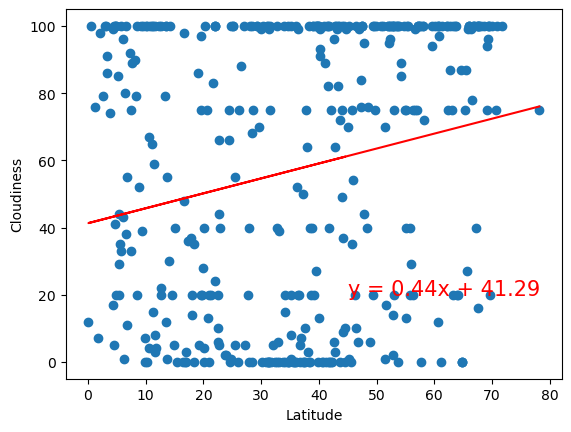

In [19]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
line_eq = lr_plot(x_values, y_values)
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.show()

The r-square value is: 0.06403405823317905


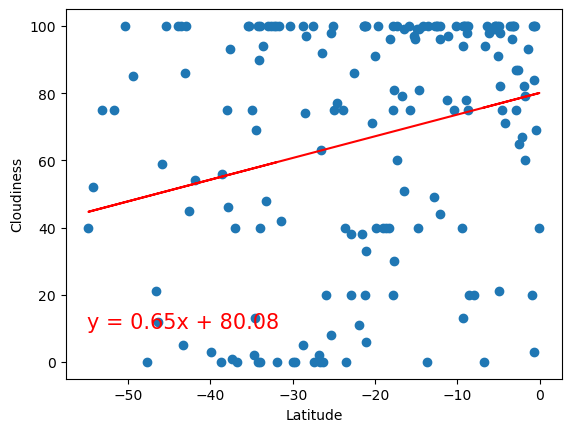

In [20]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
line_eq = lr_plot(x_values, y_values)
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** As with humidity, the correlation appears fairly weak and does not match up well with latitude in opposite hemispheres. That is, cloudiness in the southern hemisphere decreases as you move away from the equator, but it increases in the northern hemisphere as you move away from the equator. The most interesting item to note in both the northern and southern hemisphere plots is that there is a cluster of data at both the 100% and 0% cloud cover points, suggesting that most cities are either mostly clear or almost entirely cloudy on the day in question. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-square value is: 0.014222549171192912


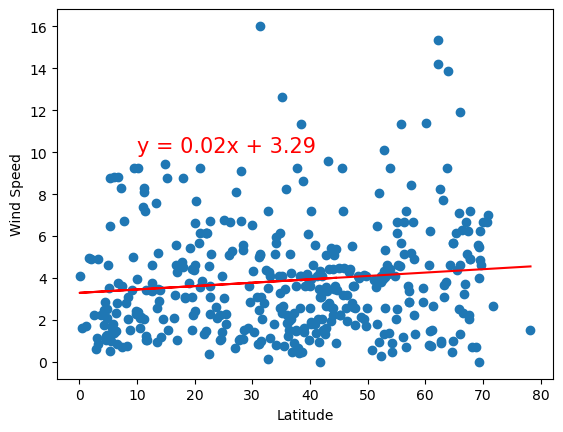

In [21]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
line_eq = lr_plot(x_values, y_values)
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.show()

The r-square value is: 0.11218310584454773


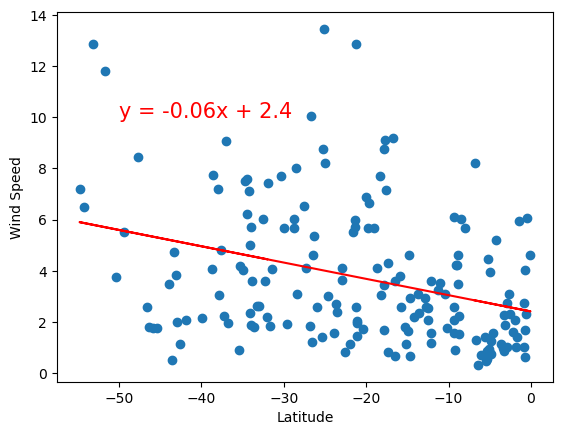

In [22]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
line_eq = lr_plot(x_values, y_values)
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere data, there is almost no correlation at all between latitude and wind speed for the particular date the data were generated. For the southern hemisphre, there appears to be a very week correlation based upon the r-squared value with wind speeds increasing as you move away from the equator. To know whether this correlation is real or not, particularly given the absence of a similar effect in the northern hemisphere, we would have to collect samples on multiple days throughout the year.